# Conclusion

## Prediction Result

In [12]:
#import data
import pandas as pd
import numpy as np
prediction_SVR=pd.read_csv('prediction_SVR.csv')
prediction_SVR.head(5)

,# et,lnet,linear,rbf,poly,et-linear,et-rbf,et-poly
0,106.285,4.666124,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,105.900,4.662495,0.037792,-0.001948,0.002931,110.378541,106.078133,106.596977
2,106.605,4.669130,0.047518,0.002156,-0.000266,115.750136,106.307038,106.568673
3,106.775,4.670724,0.044623,-0.000028,0.009743,121.032272,106.304026,107.612070
4,107.385,4.676421,0.047171,0.000675,-0.005429,126.878312,106.375832,107.029375


In [13]:
prediction_ANN=pd.read_csv('prediction_ANN.csv')
prediction_ANN

,# et,lnet,ANN,et_ANN
0,106.285,4.666124,0.000000,0.000000
1,105.900,4.662495,-0.087806,97.350572
2,106.605,4.669130,0.075516,104.986803
3,106.775,4.670724,0.009444,105.982991
4,107.385,4.676421,0.017065,107.807135
5,106.925,4.672128,-0.056528,101.882105
6,106.780,4.670771,0.003828,102.272821
7,107.195,4.674650,0.048258,107.329307


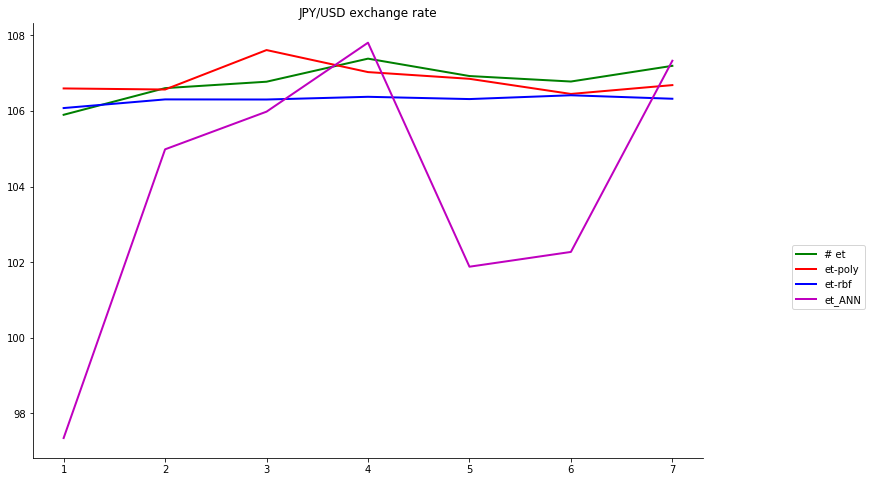

In [14]:
# show prediction result.
#Because linear prediction is far from the reality, we didn't draw it.
import matplotlib.pyplot as plt
import seaborn as sns 
real=prediction_SVR.iloc[1:,0]
poly=prediction_SVR.iloc[1:,7]
rbf=prediction_SVR.iloc[1:,6]
ann=prediction_ANN.iloc[1:,3]
real.plot(figsize=(12,8),color='g',linewidth=2.0)
poly.plot(figsize=(12,8),color='r',linewidth=2.0)
rbf.plot(figsize=(12,8),color='b',linewidth=2.0)
ann.plot(figsize=(12,8),color='m',linewidth=2.0)
plt.legend(bbox_to_anchor=(1.25, 0.5))
plt.title("JPY/USD exchange rate")
sns.despine()
plt.show()

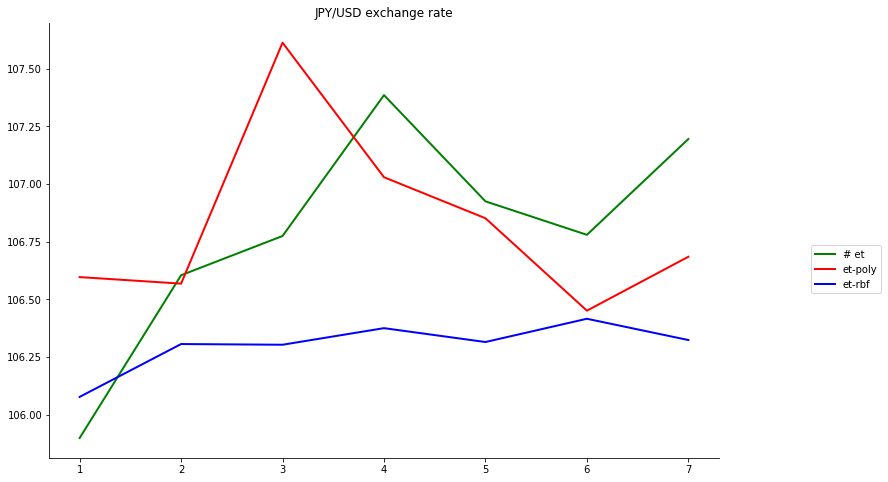

In [15]:
real.plot(figsize=(12,8),color='g',linewidth=2.0)
poly.plot(figsize=(12,8),color='r',linewidth=2.0)
rbf.plot(figsize=(12,8),color='b',linewidth=2.0)
plt.legend(bbox_to_anchor=(1.25, 0.5))
plt.title("JPY/USD exchange rate")
sns.despine()
plt.show()

## Error Index 

In [46]:
#import data
index_SVR=pd.read_csv('index_SVR.csv')
index_SVR.head(5)

,# MSE,MAE,RMSE,MAPE,U
0,20.350811,538.486704,4.511187,0.190270,0.809730
1,0.405378,0.241081,0.636693,0.003799,0.996201
2,0.542791,0.374570,0.736744,0.005073,0.994927


In [45]:
index_ANN=pd.read_csv('index_ANN.csv')
index_ANN

,# MSE,MAE,RMSE,MAPE,U
0,3.00945,17.468607,1.734777,0.028269,0.971731


In [47]:
index=pd.DataFrame(columns=('# MSE','MAE','RMSE','MAPE','U'))
index=index.append(index_SVR)
index=index.append(index_ANN)
index

,# MSE,MAE,RMSE,MAPE,U
0,20.350811,538.486704,4.511187,0.190270,0.809730
1,0.405378,0.241081,0.636693,0.003799,0.996201
2,0.542791,0.374570,0.736744,0.005073,0.994927
0,3.009450,17.468607,1.734777,0.028269,0.971731


In [48]:
indexname=['linear','poly','rbf','ann']
index.insert(0,'index',indexname)
index

,index,# MSE,MAE,RMSE,MAPE,U
0,linear,20.350811,538.486704,4.511187,0.190270,0.809730
1,poly,0.405378,0.241081,0.636693,0.003799,0.996201
2,rbf,0.542791,0.374570,0.736744,0.005073,0.994927
0,ann,3.009450,17.468607,1.734777,0.028269,0.971731


In [49]:
from matplotlib import mlab
from matplotlib import rcParams
U=index.iloc[1:,5]
MAPE=index.iloc[1:,4]
MSE=index.iloc[1:,1]
MAE=index.iloc[1:,2]
RMSE=index.iloc[1:,3]

([<matplotlib.axis.XTick at 0xb3dfe48>,
 <a list of 3 Text xticklabel objects>)

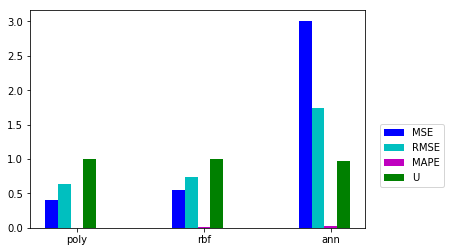

In [51]:
# Draw a Bar Graph
X=np.arange(3)
width=0.1
plt.bar(X,MSE,width,color='b',label='MSE')
plt.bar(X+width,RMSE,width,color='c',label=('RMSE'))
plt.bar(X+width*2,MAPE,width,color='m',label=('MAPE'))
plt.bar(X+width*3,U,width,color='g',label='U')
plt.legend(bbox_to_anchor=(1.25, 0.5))
plt.xticks((0.2,1.2,2.2),('poly','rbf','ann'))